In [114]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
import seaborn 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import pingouin as pg
import scipy.stats as st

In [2]:
import imblearn

In [3]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# I. Introduction et motivations

### Objectif Global :
Le double objectif de ce projet est : 
- La prise en main/découverte de different outil de Machine Learning sur Python.
- L'étude des performances de prédiction de nos outils sur nos données.

Pour ce faire nous avons choisit d'appliquer notre travail sur un problème de sociale majeur : La discrimination sur le marché de l'immobilier. Le recherche d'une base de données sur sujet a été compliqué. Ainsi, nous nous sommes concentré sur la question de l'ocroit ou non d'un pret immobilier, grâce à une base de données receuilli dans les années 90 par la réserve féderal de Boston. L'intérêt pour nous et de savoir si l'éthnie d'un demandeurs de prêt immobilier peut impacter l'octroi de son crédit.
Beaucoup d'etude ont été réalisé sur ce sujet dans les années 70 à 90 aux États-Unis. Il peut être intéressant de comparer nos résultats à ces données.


#### Découverte des variables de la base de données :


In [5]:
data = pd.read_csv('Loan_data.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   approve     1989 non-null   int64  
 1   loanamt     1989 non-null   int64  
 2   term        1989 non-null   float64
 3   caution     1989 non-null   int64  
 4   atotinc     1989 non-null   int64  
 5   cototinc    1989 non-null   float64
 6   hrat        1989 non-null   float64
 7   obrat       1989 non-null   float64
 8   sex         1974 non-null   object 
 9   university  1989 non-null   int64  
 10  race        1989 non-null   object 
 11  married     1986 non-null   float64
 12  dep         1986 non-null   float64
 13  exper       1989 non-null   int64  
 14  self        1989 non-null   int64  
 15  score       1980 non-null   float64
 16  delinq      1989 non-null   int64  
 17  mortperf    1989 non-null   int64  
 18  mortlat1    1989 non-null   int64  
 19  mortlat2    1989 non-null  

In [6]:
data.describe()

,approve,loanamt,term,caution,atotinc,cototinc,hrat,obrat,university,married,dep,exper,self,score,delinq,mortperf,mortlat1,mortlat2
count,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1986.000000,1986.000000,1989.000000,1989.000000,1980.000000,1989.000000,1989.000000,1989.000000,1989.000000
mean,0.877325,143.245349,2351.459779,0.028658,5195.549522,1547.177235,24.790915,32.389035,0.771745,0.658610,0.770896,0.209653,0.129211,1.503030,0.837607,0.638512,0.019105,0.010558
std,0.328146,80.520410,44795.737413,0.166884,5269.055628,2361.813345,7.119459,8.263018,0.419814,0.474295,1.104321,1.003910,0.335517,0.986258,0.368904,0.480552,0.136929,0.102234
min,0.000000,2.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,100.000000,360.000000,0.000000,2876.000000,0.000000,21.000000,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,126.000000,360.000000,0.000000,3813.000000,1145.000000,25.770000,33.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,165.000000,360.000000,0.000000,5596.000000,2417.000000,29.000000,37.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,980.000000,999999.375000,1.000000,81000.000000,41667.000000,72.000000,95.000000,1.000000,1.000000,8.000000,9.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.isnull().sum()
data1=data.dropna() #Suppression de 26 lignes
data1.shape

(1963, 20)

# Etape 1: Visualisation des données pour la detection d'outlier

In [8]:
#Création d'une nouvelle table contenant seulement les variables quantitatives
col = [ 1, 2, 4, 5, 6, 7, 12, 13]
data_quanti = data1.iloc[: , col]
#data_quanti.shape
#data_quanti.info()

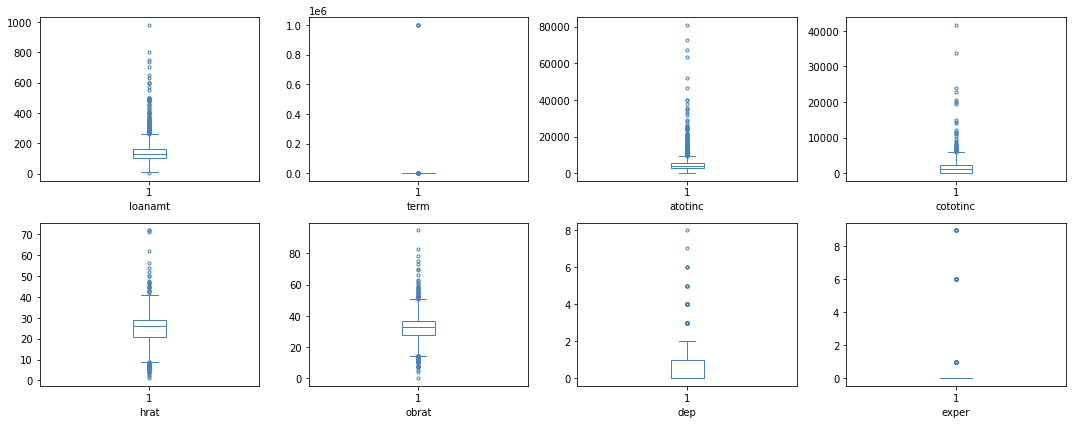

In [9]:
#Boxplot pour les variables quatitatives
c = 'steelblue'
blue_dict =  {'patch_artist': True,
             'boxprops': dict(color=c, facecolor='w'),
             'capprops': dict(color=c),
             'flierprops': dict(color=c, markeredgecolor=c,marker="."),
             'medianprops': dict(color=c),
             'whiskerprops': dict(color=c)}

plt.close()
plt.figure(figsize=(15,6))
for i in np.arange(start=0,stop=data_quanti.shape[1]):
    plt.subplot(2, 4, i+1)
    plt.boxplot(data_quanti.iloc[:,i],**blue_dict)
    plt.xlabel(data_quanti.columns[i])
plt.tight_layout()
plt.show()

Les boites à moustache nous permettent de détecter des valeurs extremes ou abérrantes. On remarque notamment pour la variable **term** des valeurs qui semblent abérantes. En effet, pour 3 individus le nombre de mois de demandé pour rembrouser le crédit immobilier et de 1 000 000. On peut supposer que des 0 sont en trop, ou qu'il s'agit de cas extreme. Nous préferons donc les exclures de la base de données.

In [10]:
#Faisons une histogramme de la variable term pour mieux identifier cette valeur
#plt.hist(data_quanti.iloc[:,1])
data_quanti.iloc[:,1].describe()

count      1963.000000
mean       2377.836729
std       45090.981622
min           6.000000
25%         360.000000
50%         360.000000
75%         360.000000
max      999999.375000
Name: term, dtype: float64

In [11]:
#Suppression d'outliers
data_quanti=data_quanti[(data_quanti["term"]<500)] 
data2=data1[(data1["term"]<500)] 
data2.shape

(1959, 20)

# Etape 2: Analyse Univariée

## 2.1. Analyse univariée des variables quantitatives

Dans le jeu de données « Loan_data.csv », il y a 8 variables quantitatives (loanmt, term, atotinc, cototinc, hart, obrat, dep et exper). Pour chacune de ces variables, nous présentons les paramètres de tendances centrales (Moyenne, Maximum, Minimum, quantiles (25%, 50% et 75%)) et l’écart-type comme indicateur de dispersion.

### 2.1.1. Parametres des tendances centrales et indicateur de dispersion.

In [12]:
# Tableau des indicateurs
col = [ 1, 2, 4, 5, 6, 7, 12, 13]
data2.iloc[: , col].describe()

,loanamt,term,atotinc,cototinc,hrat,obrat,dep,exper
count,1959.000000,1959.000000,1959.000000,1959.000000,1959.000000,1959.000000,1959.000000,1959.000000
mean,143.493619,340.835120,5160.489535,1552.738397,24.850373,32.452318,0.771822,0.207759
std,80.920571,64.770711,5206.785465,2373.606577,7.085904,8.226071,1.105979,0.991394
min,2.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,100.000000,360.000000,2875.000000,0.000000,21.000000,28.000000,0.000000,0.000000
50%,127.000000,360.000000,3794.000000,1152.000000,25.900000,33.000000,0.000000,0.000000
75%,165.000000,360.000000,5583.000000,2417.000000,29.000000,37.000000,1.000000,0.000000
max,980.000000,480.000000,81000.000000,41667.000000,72.000000,95.000000,8.000000,9.000000


D'après les résultats du tableau des indicateurs ci-dessus, nous remarquons que le montant du prêt immobilier est compris entre 2,000.00 et 980,000.00 dollars US. Le montant du prêt immobilier est en moyenne de 143,493.619 dollars US. La durée moyenne du prêt est de 341 mois environ et la durée minimale respectivement maximale du prêt immobilier est respectivement 6 et 480 mois. Le revenu moyen mensuel total des emprunteurs est de 5160.490 dollars US. Le ratio des frais de logement par rapport au revenu (pourcentage total sur revenu) est de 24.85 c'est-à-dire que le revenu total des emprunteurs est 24 fois plus élevé que leur frais de logement en moyenne et ce ratio est compris entre 1 et 72. En outre, Le ratio des autres dépenses par rapport au revenu est de 32.45 en moyenne alors nous pouvons dire que les frais de logement représentent une grande part du budget des dépenses des emprunteurs. En moyenne, les personnes demandant le prêt ont seulement une personne à leur charge et ont en moyenne moins d'une année expérience professionnel.

### 2.1.2. Représentation graphique des variables quantitatives

**Graphiques : Distribution des variables**

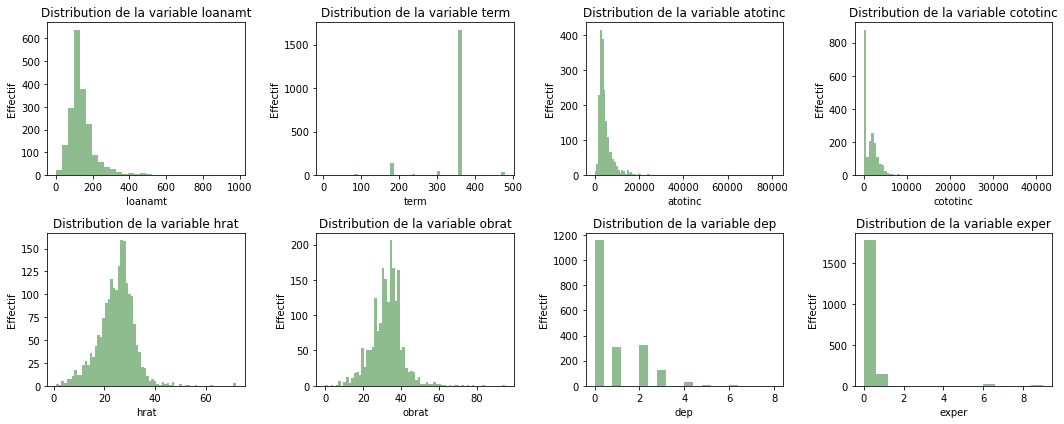

In [13]:
# Graphique: Distribution
b=[30,50,100,70,70,70,20,15]
plt.figure(figsize=(15,6))
for i in np.arange(start=0,stop=data_quanti.shape[1]):
    plt.subplot(2, 4, i+1)
    plt.hist(data_quanti.iloc[: , i], bins=b[i], color='darkseagreen')
    plt.xlabel(data_quanti.columns[i])
    plt.ylabel('Effectif')
    plt.title('Distribution de la variable ' + data_quanti.columns[i])
plt.tight_layout()
plt.show()


Le graphique ci-dessus represente la distribution de la variable loanamt, en ordonnée, il y a la fréquence absolue des emprunteurs et en abscisse, il y a le montant le montant du prêt immobilier (en millier de dollar). Donc, le graphique montre que montant du pret le plus demandé par les empruteurs varie entre 50,000.00 et 200,000.00 dollars US.

## 2.2.  Analyse Univarée des variables qualitatives

Dans la base de données "Loan_data.csv", nous avons 12 variables qualitatives que nous allons analyser ces variables en présentant un graphique pour visualiser leur distribution et en donant un tri a plat de chaque variable.

### 2.2.1. Tri à plat et graphique des variables qualitatives.

In [14]:
#Creation d'une novelle table contenant seulement les variables qualitatives
col1=[0,3,8,9,10,11,14,15,16,17,18,19]
data_quali = data2.iloc[:,col1]
#data_quali.shape
#data_quali.info()
data_quali.loc[:,"Approve_rec"] = data_quali.iloc[:,0].replace({1: "Oui", 0: "Non"})
data_quali.loc[:,"caution_rec"] = data_quali.iloc[:,1].replace({1: "Une Mise en Garde", 0: "Pas de Mise en Garde"})
data_quali.loc[:,"uni_rec"] = data_quali.iloc[:,3].replace({1: "Oui", 0: "Non"})
data_quali.loc[:,"married_rec"] = data_quali.iloc[:,5].replace({1: "Oui", 0: "Non"})
data_quali.loc[:,"self_rec"] = data_quali.iloc[:,6].replace({1: "Oui", 0: "Non"})
data_quali.loc[:,"delinq_rec"] = data_quali.iloc[:,8].replace({1: "Oui", 0: "Non"})
data_quali.loc[:,"mortperf_rec"] = data_quali.iloc[:,9].replace({1: "Oui", 0: "Non"})
data_quali.loc[:,"mortlat1_rec"] = data_quali.iloc[:,10].replace({1: "Oui", 0: "Non"})
data_quali.loc[:,"mortlat2_rec"] = data_quali.iloc[:,12].replace({1: "Oui", 0: "Non"})

C:\Users\Sonico SAMEDY\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Sonico SAMEDY\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


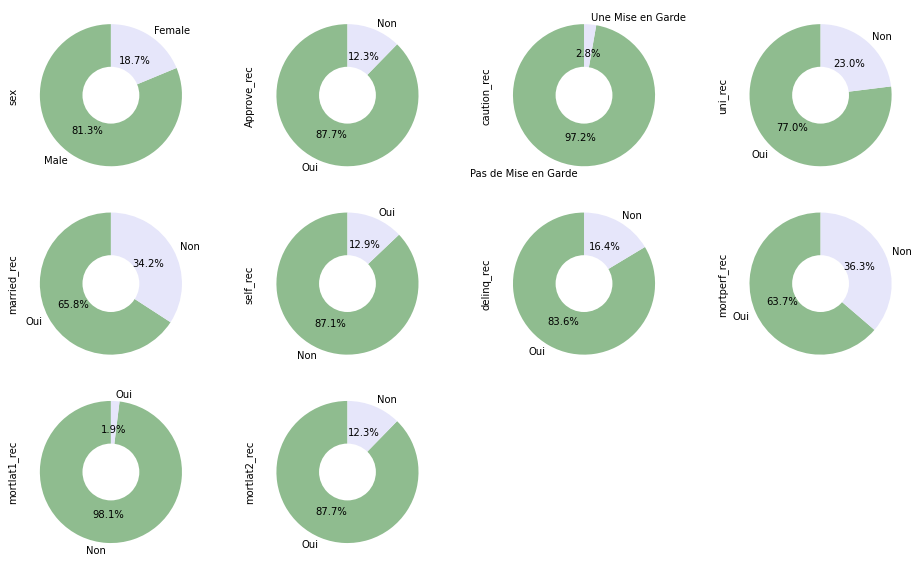

In [15]:
#Pie des varibales qualitatives binaires
col3=[2,12,13,14,15,16,17,18,19,20]
j=1
plt.figure(figsize=(13,8))
for i in col3:
    plt.subplot(3, 4, j)
    j=j+1
    data_quali.iloc[:,i].value_counts().plot.pie(subplots=True ,
                                                 autopct='%1.1f%%',
                                                 startangle=90, 
                                                 colors = ['darkseagreen','lavender'])
    centre_circle = plt.Circle((0,0),0.4,color='black', fc='white',linewidth=0)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle) 
plt.tight_layout() 
plt.show()

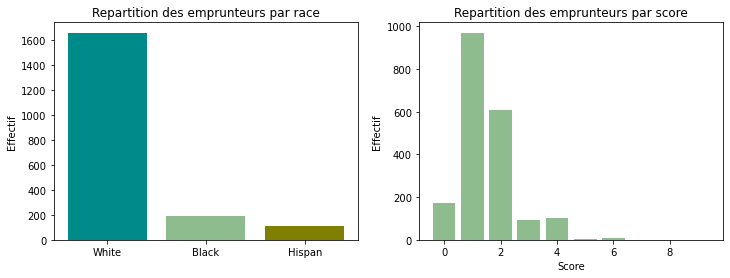

In [16]:
# Bar plot de la variable race 
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.bar(data_quali['race'].value_counts().index, data_quali['race'].value_counts().values , color=['darkcyan','darkseagreen', 'olive'], width=0.8)
plt.ylabel('Effectif')
plt.title('Repartition des emprunteurs par race')

# Bar plot de la variable score
plt.subplot(1, 2, 2)
plt.bar(data_quali['score'].value_counts().index, data_quali['score'].value_counts().values, color=['darkseagreen'])
plt.ylabel('Effectif')
plt.xlabel('Score')
plt.title('Repartition des emprunteurs par score')
plt.show()

# Etape 3 : Analyse Bivariée

## 3.1. Etude de liaison entre les varaibles quantitatives.

Dans cette partie du document, nous etudions la liaison entre les variables quantitatives(loanmt, term, atotinc, cototinc, hart, obrat, dep et exper). Pour ce faire, nous utilisons comme indicateurs la matrice des coefficients de correlations, ensuite nous realisons le graphe nuage de points pour les couples de variables afin de visualiser la liaison qui existe entre les couples des variables et enfin, pour confirmer cette liaison nous realisons des tests statistiques.

### 3.1.1. Matrice des coefficients de correlations.

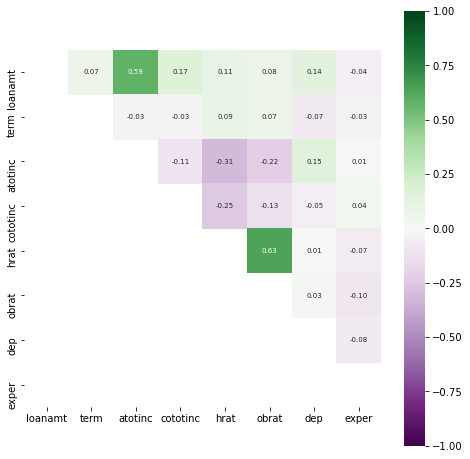

In [17]:
#Matrice de corrélation
col = [ 1, 2, 4, 5, 6, 7, 12, 13]
plt.figure(figsize=(8,8))
masque  =  np.tril(data2.iloc[: , col].corr())
sns.heatmap(data2.iloc[: , col].corr(),annot=True,annot_kws={"size": 7}, vmin=-1, vmax=1,fmt='.2f',cmap= 'PRGn' ,square=True,mask = masque)
plt.show() 

D'apres le graphique de la matrice de correlation ci-dessus, nous remarquons qu'il y a à priori une forte correlation positive entre les varables "loanamt" et "atotinc". Ce qui est tout à fait logique car le montant du pret immobilier depend du revenu mensuel total de la personne demandant le pret. Ensuite, il y a à priori une forte correlation entre les variables "obrat" et "hrat". Puis, nous constatons qu'à priopri une faible correlation entre "expr" designant le nombre d'années d'experience professionnel de la personne demandant le pret par rapport à toutes les autres variables, une faible correlation entre la variable "dep" et les autres variables.

### 3.1.2. Graphique pour visualiser la liaison entre les variables quantitatives:

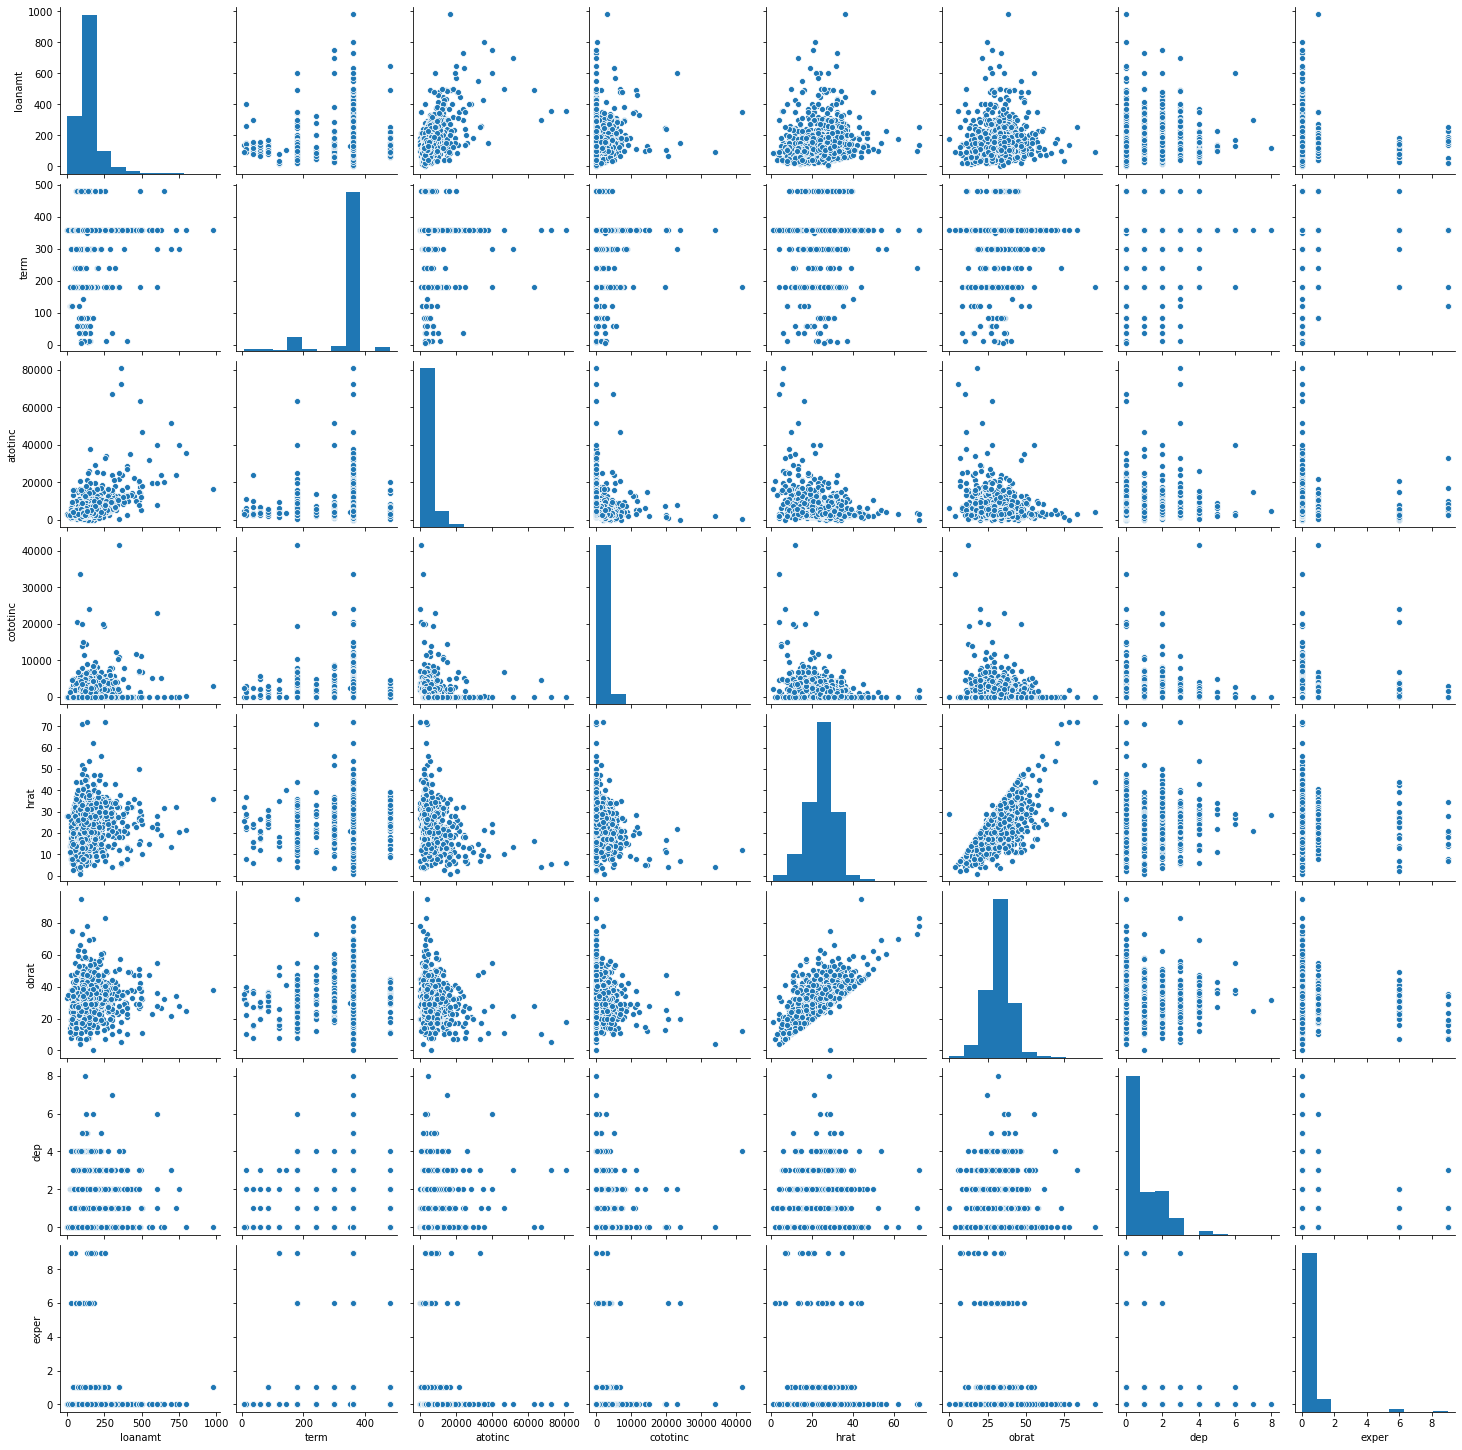

In [18]:
#Attention long a executer
sns.pairplot(data2.iloc[: , col]);

### 3.1.3. Tests statitisques pour confirmer les liaisons

Pour confirmer les liaisons existant entre les variables ci-dessous, nous réalisons le test du coefficient de corrélation linéaire de Pearson à 0.

In [19]:
# Tests statistiques pour confirmer la liaison entre les variables
# Matrice des p-values (pearson)
data2.iloc[: , col].rcorr(stars=False, decimals=4)

,loanamt,term,atotinc,cototinc,hrat,obrat,dep,exper
loanamt,-,0.0038,0.0000,0.0000,0.0000,0.0008,0.0000,0.0475
term,0.0654,-,0.2606,0.2269,0.0000,0.0028,0.0017,0.1523
atotinc,0.5858,-0.0254,-,0.0000,0.0000,0.0000,0.0000,0.7100
cototinc,0.17,-0.0273,-0.1053,-,0.0000,0.0000,0.0193,0.1183
hrat,0.1069,0.0924,-0.3074,-0.2471,-,0.0000,0.5215,0.0032
obrat,0.0757,0.0676,-0.221,-0.1308,0.633,-,0.2129,0.0000
dep,0.1387,-0.0709,0.1499,-0.0529,0.0145,0.0282,-,0.0007
exper,-0.0448,-0.0324,0.0084,0.0353,-0.0665,-0.0957,-0.0765,-


Dans le tableau ci-dessus, nous trouvons les p-values de pearson dans la partie superieure de la matrice. En effet, les resultats montrent que la variable "loanamt" (le montant du pret immobilier) est correlée avec toutes les autres variables au seuil de 5%.
La variable "term"(la durée du prêt en terme de mois) est correlée avec les variables "hrat", "obrat", "dep" et non correlee avec les variables "atotinc", "cototinc" et "expr". Ce qui signifie que la durée du pret dépend du ratio des frais de logement de l'emprunteur, de ses autres dépenses et du nombre de personne à sa charge. Donc, la durée du pret depend est liée aux dépenses de l'emprunteur.
La variable "expr" (Nombre d'année d'expérience professionnel) est correlée avec les variables "hrat", "obrat", "loanamt" et "dep". 


### 3.1.4. Représentation graphique  de la distribution des variables "Atotinc", "hrat", "obrat", "dep" , "exper" et "cototinc" en fonction de la variable "approve" 

[Text(0, 0, 'Non'), Text(0, 0, 'Oui')]

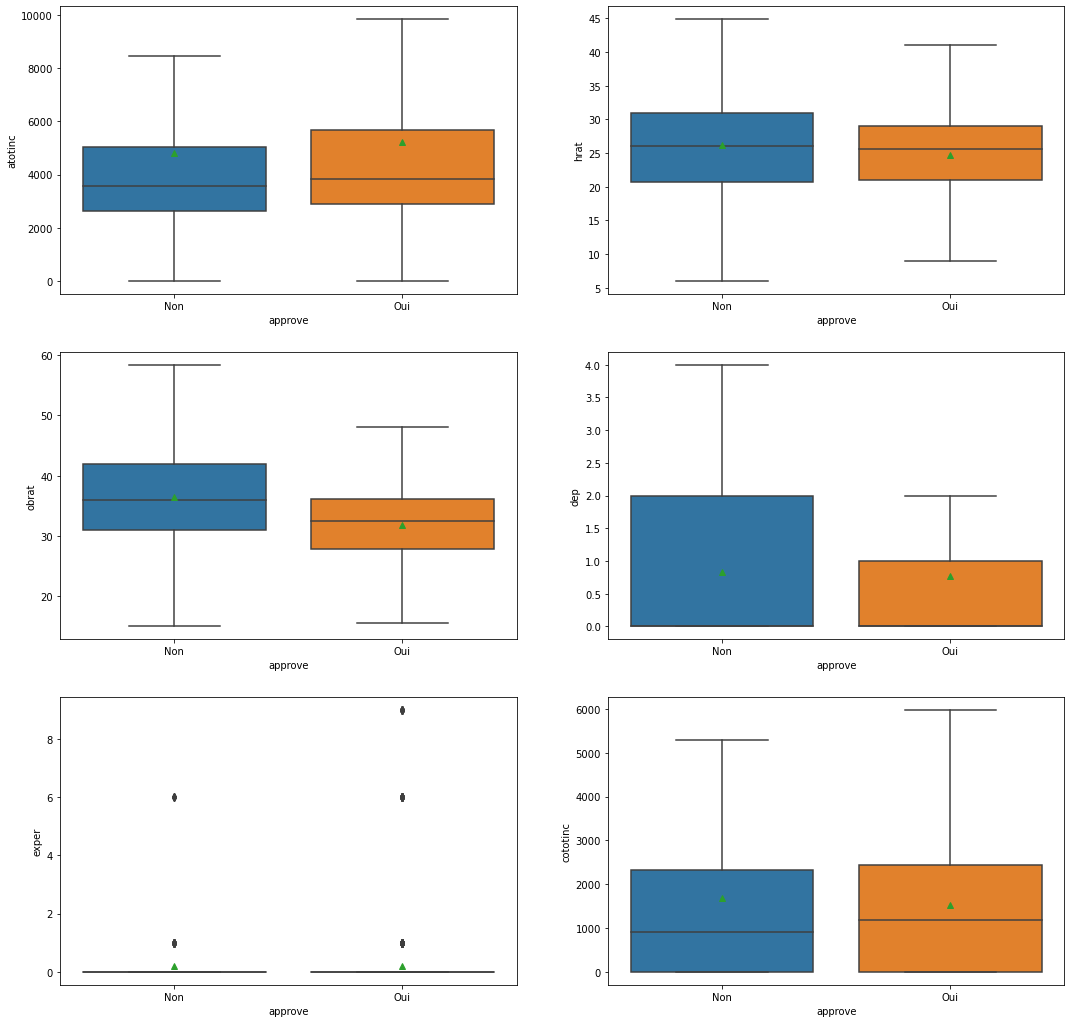

In [110]:
# Boxplot de la distiribution des variables "Atotinc", "hrat", "obrat", "dep" et "exper" en fonction de la variable "approve"
f, axes = plt.subplots(3, 2, figsize=(18,18))
sns.boxplot(y=data2["atotinc"],x=data2["approve"], showfliers=False, showmeans=True,ax=axes[0,0])
axes[0,0].set_xticklabels(["Non", "Oui"])
sns.boxplot(y=data2["hrat"],x=data2["approve"], showfliers=False, showmeans=True, ax=axes[0,1])
axes[0,1].set_xticklabels(["Non", "Oui"])
sns.boxplot(y=data2["obrat"],x=data2["approve"], showfliers=False, showmeans=True, ax=axes[1,0])
axes[1,0].set_xticklabels(["Non", "Oui"])
sns.boxplot(y=data2["dep"],x=data2["approve"], showfliers=False, showmeans=True, ax=axes[1,1])
axes[1,1].set_xticklabels(["Non", "Oui"])
sns.boxplot(y=data2["exper"],x=data2["approve"], showmeans=True, ax=axes[2,0])
axes[2,0].set_xticklabels(["Non", "Oui"])
sns.boxplot(y=data2["cototinc"],x=data2["approve"], showfliers=False, showmeans=True, ax=axes[2,1])
axes[2,1].set_xticklabels(["Non", "Oui"])

## 3.2. Etude de liaison entre les variables qualitatives

Dans cette partie, nous verifions la liaison qui existe entre la variable dépendante  (qui est une variable qualitative dichotomique) et les autres variables qualitatives du jeu de données. Pour ce faire, nous réalisons un test d'independance de Khi-deux.

### 3.2.1. Test d'indépendance Khi-deux

In [115]:
#Test Khi-deux entre la variable "approve" et "sex"
X = "Approve_rec"
Y = "sex"

cont = data_quali[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).copy()
cont = cont.astype(int)
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
st_p

0.5546966229433589

In [117]:
#Test Khi-deux entre la variable "approve" et "caution"
X = "Approve_rec"
Y = "caution_rec"

cont1 = data_quali[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).copy()
cont1 = cont1.astype(int)
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont1)
st_p

0.7188647430377841

In [120]:
#Test Khi-deux entre la variable "approve" et "race"
X = "Approve_rec"
Y = "race"

cont = data_quali[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).copy()
cont = cont.astype(int)
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
st_p

3.722365099964352e-22

In [121]:
#Test Khi-deux entre la variable "approve" et "uni"
X = "Approve_rec"
Y = "uni_rec"

cont = data_quali[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).copy()
cont = cont.astype(int)
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
st_p

0.10168090871083958

In [122]:
#Test Khi-deux entre la variable "approve" et "married"
X = "Approve_rec"
Y = "married_rec"

cont = data_quali[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).copy()
cont = cont.astype(int)
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
st_p

0.00829790648866826

In [123]:
#Test Khi-deux entre la variable "approve" et "self"
X = "Approve_rec"
Y = "self_rec"

cont = data_quali[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).copy()
cont = cont.astype(int)
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
st_p

0.08582071930147311

In [124]:
#Test Khi-deux entre la variable "approve" et "delinq"
X = "Approve_rec"
Y = "delinq_rec"

cont = data_quali[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).copy()
cont = cont.astype(int)
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
st_p

1.5699404500732212e-24

In [125]:
#Test Khi-deux entre la variable "approve" et "mortperf"
X = "Approve_rec"
Y = "mortperf_rec"

cont = data_quali[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).copy()
cont = cont.astype(int)
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
st_p

0.0016744265549047113

In [126]:
#Test Khi-deux entre la variable "approve" et "mortlat1"
X = "Approve_rec"
Y = "mortlat1_rec"

cont = data_quali[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).copy()
cont = cont.astype(int)
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
st_p

0.016105603881269474

D'après les résultats des tests statistiques réalisés ci-dessus, nous remarquons que la variable "approve" est significativement liée avec les variables "race", "mararied", "delinq" et "mortperf" car les probabilités (p-values) sont inférieur à 5%. Dans ce cas, l'hypothèse nulle est rejetée c'est-à-dire que les variables ne sont pas ind♪0pendantes. Ce qui traduit que l'ocroit ou non d'un pret immobilier dépend de l'ethnie, du statut matrimonial et de l'historique de non-remboursement de crédit à la consommation du démandeur du pret.

### 3.2.2. Graphique des couples de variables qualitatives significativement liées.

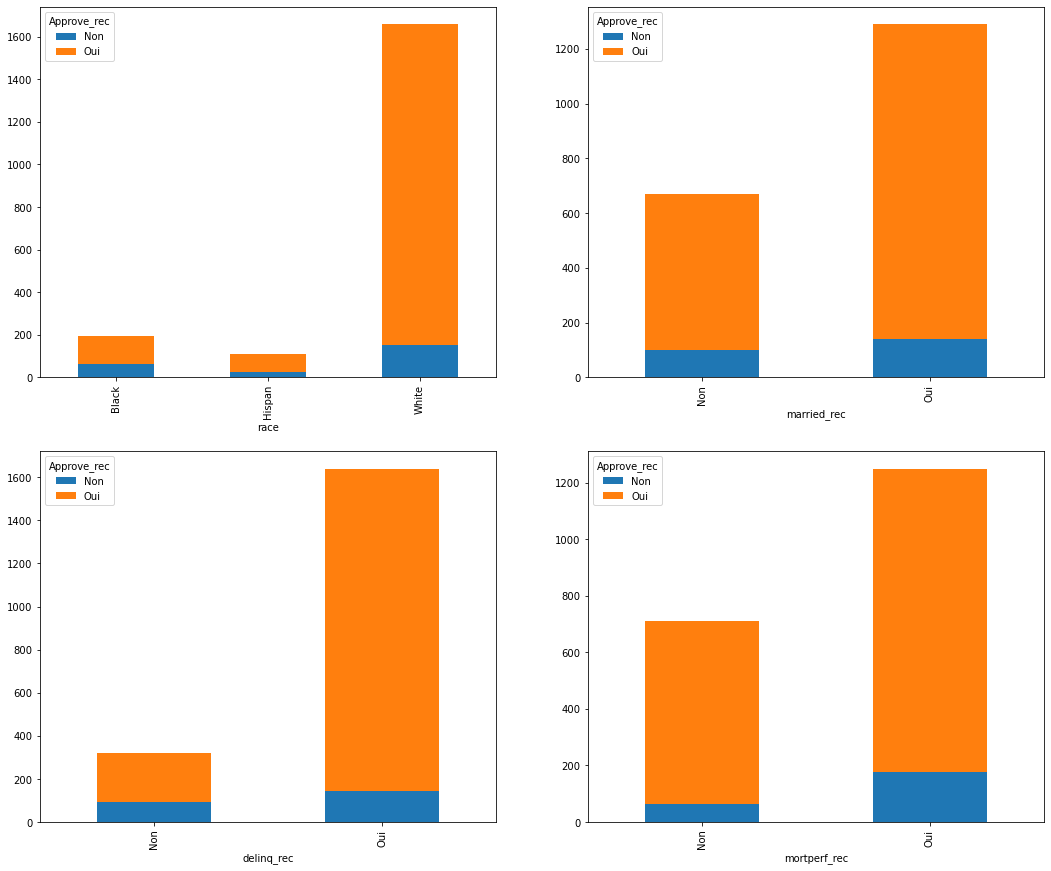

In [162]:
f, axes = plt.subplots(2, 2, figsize=(18,15))
ct = pd.crosstab(data_quali['race'], data_quali['Approve_rec'])
ct.plot.bar(stacked=True ,ax=axes[0,0])

ct1 = pd.crosstab(data_quali['married_rec'], data_quali['Approve_rec'])
ct1.plot.bar(stacked=True ,ax=axes[0,1])

ct2 = pd.crosstab(data_quali['delinq_rec'], data_quali['Approve_rec'])
ct2.plot.bar(stacked=True ,ax=axes[1,0])

ct3 = pd.crosstab(data_quali['mortperf_rec'], data_quali['Approve_rec'])
ct3.plot.bar(stacked=True ,ax=axes[1,1])

In [167]:
ct = pd.crosstab(data_quali['race'], data_quali['Approve_rec'],normalize='index')\
       .round(4)*100
ct

Approve_rec,Non,Oui
race,,
Black,32.12,67.88
Hispan,24.07,75.93
White,9.23,90.77


In [168]:
ct1 = pd.crosstab(data_quali['married_rec'], data_quali['Approve_rec'],normalize='index')\
       .round(4)*100
ct1

Approve_rec,Non,Oui
married_rec,,
Non,15.10,84.90
Oui,10.85,89.15


In [169]:
ct2 = pd.crosstab(data_quali['delinq_rec'], data_quali['Approve_rec'],normalize='index')\
       .round(4)*100
ct2

Approve_rec,Non,Oui
delinq_rec,,
Non,29.60,70.40
Oui,8.91,91.09


In [170]:
ct3 = pd.crosstab(data_quali['mortperf_rec'], data_quali['Approve_rec'],normalize='index')\
       .round(4)*100
ct3


Approve_rec,Non,Oui
mortperf_rec,,
Non,9.14,90.86
Oui,14.10,85.90


# Etape 4 : Analyse Multivariée

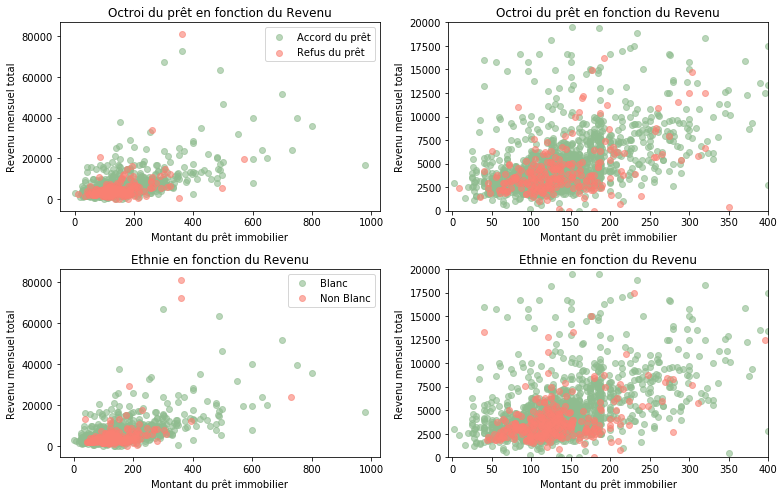

In [376]:
plt.figure(figsize=(11,7))
plt.subplot(2, 2, 1)
plt.scatter(data2[data2["approve"]==1]["loanamt"], data2[data2["approve"]==1]["atotinc"],alpha=0.6,c='darkseagreen');
plt.scatter(data2[data2["approve"]==0]["loanamt"], data2[data2["approve"]==0]["atotinc"],alpha=0.6,c='salmon');
plt.xlabel('Montant du prêt immobilier')
plt.ylabel('Revenu mensuel total')
plt.title('Octroi du prêt en fonction du Revenu');
plt.legend( ["Accord du prêt", "Refus du prêt"]);
plt.subplot(2, 2, 2)
plt.scatter(data2[data2["approve"]==1]["loanamt"], data2[data2["approve"]==1]["atotinc"],alpha=0.6,c='darkseagreen');
plt.scatter(data2[data2["approve"]==0]["loanamt"], data2[data2["approve"]==0]["atotinc"],alpha=0.6,c='salmon');
plt.axis([-5, 400, -5, 20000])
plt.xlabel('Montant du prêt immobilier')
plt.ylabel('Revenu mensuel total')
plt.title('Octroi du prêt en fonction du Revenu');

plt.subplot(2, 2, 3)
temp=data2.sort_values("race",ascending=False)
plt.scatter(data2[data2["race"]=="White"]["loanamt"], data2[data2["race"]=="White"]["atotinc"],alpha=0.6,c='darkseagreen');
plt.scatter(data2[data2["race"]!="White"]["loanamt"], data2[data2["race"]!="White"]["atotinc"],alpha=0.6,c='salmon');
plt.xlabel('Montant du prêt immobilier')
plt.ylabel('Revenu mensuel total')
plt.title('Ethnie en fonction du Revenu');
plt.legend( ["Blanc", "Non Blanc"]);
plt.subplot(2, 2, 4)
plt.scatter(data2[data2["race"]=="White"]["loanamt"], data2[data2["race"]=="White"]["atotinc"],alpha=0.6,c='darkseagreen');
plt.scatter(data2[data2["race"]!="White"]["loanamt"], data2[data2["race"]!="White"]["atotinc"],alpha=0.6,c='salmon');
plt.axis([-5, 400, -5, 20000])
plt.xlabel('Montant du prêt immobilier')
plt.ylabel('Revenu mensuel total')
plt.title('Ethnie en fonction du Revenu');
plt.tight_layout() 

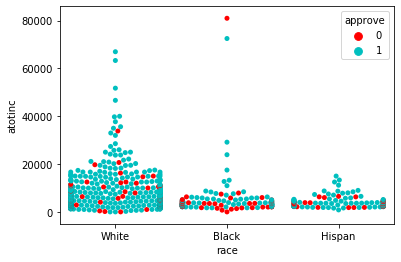

In [377]:
#je sais pas si on garde
sns.swarmplot(x="race", y="atotinc",hue='approve',
              palette=["r", "c", "y"], data=data2)
plt.show()

# Etape 5 : Echantillonnage

#### Création des variables dummies

In [378]:
data2 = pd.get_dummies(data2)

In [379]:
data_X,test_X, data_y, test_y = train_test_split(data2.drop(['approve'], axis=1),
                                                 data2["approve"], 
                                                 test_size=0.2, 
                                                 random_state=5, 
                                                 stratify=data2["approve"])

#### Echantillonage

In [380]:
data_X,test_X, data_y, test_y = train_test_split(data2.drop(['approve'], axis=1),
                                                 data2["approve"], 
                                                 test_size=0.2, 
                                                 random_state=5, 
                                                 stratify=data2["approve"])

#### Rééquilibrage de la BDD d'entrainement

In [381]:
os = SMOTE(random_state=1)
os_data_X,os_data_y=os.fit_sample(data_X, data_y)
print("Longueur de la nouvelle BDD",len(os_data_X))
print(os_data_y.value_counts())


Longueur de la nouvelle BDD 2748
1    1374
0    1374
Name: approve, dtype: int64


#### Normalisation des données

In [382]:
data_X_scale=preprocessing.scale(os_data_X)

scaler = preprocessing.StandardScaler().fit(data_scale)

test_scale_X=scaler.transform(test_X)

In [383]:
data_X_scale = pd.DataFrame(data=data_X_scale, columns=os_data_X.columns)
test_scale_X = pd.DataFrame(data=test_scale_X, columns=os_data_X.columns)

# Etape 6 : Modélisation

- La Regression Logistique
- Les Arbres de décision
- Les Fôrets Aléatoires
- ( Boosting ? réseau de neurones ? )

## 1. La Régression Logistique

In [384]:
logit = sm.Logit(os_data_y, os_data_X.astype(float))
result=logit.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.396639
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.428    
Dependent Variable: approve          AIC:              2223.9297
Date:               2020-11-21 22:02 BIC:              2354.1395
No. Observations:   2748             Log-Likelihood:   -1090.0  
Df Model:           21               LL-Null:          -1904.8  
Df Residuals:       2726             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     8.0000                                      
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
loanamt          0.0013   0.0011   1.1866 0.2354 -0.0008  0.0034
term            -0.0075   0.0008  -8.8177 0.0000 -0.0091 -0.0058
caution      

###  Selection des variables (Amélioration du critère BIC)

In [385]:
select_data=os_data_X.drop(['dep','exper','self','mortperf','mortlat2','mortlat1','hrat','loanamt','cototinc'], axis='columns')
select_test=test_X.drop(['dep','exper','self','mortperf','mortlat2','mortlat1','hrat','loanamt','cototinc'], axis='columns')

logit2 = sm.Logit(os_data_y,select_data.astype(float))
result2=logit2.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.398863
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.425    
Dependent Variable: approve          AIC:              2218.1536
Date:               2020-11-21 22:02 BIC:              2295.0957
No. Observations:   2748             Log-Likelihood:   -1096.1  
Df Model:           12               LL-Null:          -1904.8  
Df Residuals:       2735             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     8.0000                                      
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
term            -0.0074   0.0008  -9.0722 0.0000 -0.0090 -0.0058
caution          1.9539   0.5351   3.6516 0.0003  0.9051  3.0026
atotinc      

###  Prédiction - Étude des performances de prédiction

In [386]:
logreg = LogisticRegression()
modellogit=logreg.fit(select_data,os_data_y)
y_pred=logreg.predict(select_test)

conf = confusion_matrix(test_y, logreg.predict(select_test))
cf = pd.DataFrame(conf, columns=[logreg.classes_])
cf.index = [ logreg.classes_]
cf

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,0,1
0,29,19
1,67,277


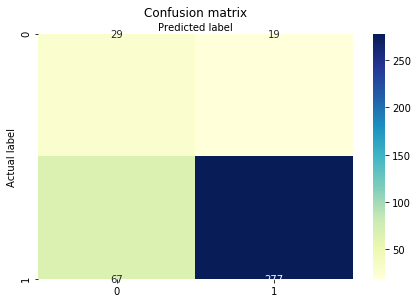

In [387]:
fig, ax = plt.subplots() #Affichage a changer !
sns.heatmap(pd.DataFrame(conf), annot=True, cmap="YlGnBu" ,fmt='g');
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [388]:
score = logreg.decision_function(select_test)
df = {'score':score,'approve':test_y,'pred':logreg.predict(select_test)}
df=pd.DataFrame(data=df)

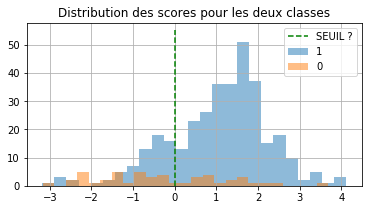

In [389]:
ax = df[df['approve'] == 1]['score'].hist(bins=25, figsize=(6,3), label='1', alpha=0.5)
df[df['approve'] == 0]['score'].hist(bins=25, ax=ax, label='0', alpha=0.5)
ax.set_title("Distribution des scores pour les deux classes")
ax.plot([0, 0], [0, 55], 'g--', label="SEUIL ?")
ax.legend();

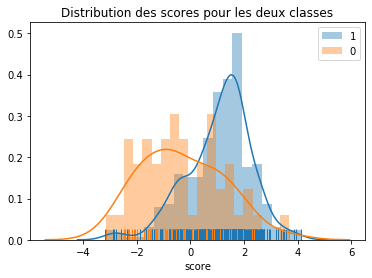

In [390]:
ax = seaborn.distplot(df[df['approve'] == 1]['score'], rug=True,bins=20, hist=True, label="1")
seaborn.distplot(df[df['approve'] == 0]['score'], rug=True, hist=True,bins=20, ax=ax, label="0")
ax.set_title("Distribution des scores pour les deux classes")
ax.legend()

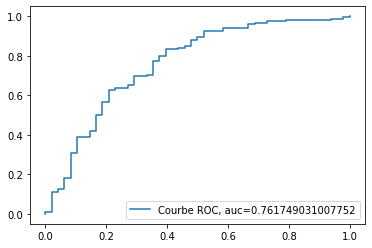

In [391]:
#  Courbe ROC
pred_proba = logreg.predict_proba(select_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_y,  pred_proba)
r_auc = metrics.roc_auc_score(test_y, pred_proba)
plt.plot(fpr,tpr,label="Courbe ROC, auc="+str(r_auc))
plt.legend(loc=4)
plt.show()

Logistic: f1=0.866 auc=0.943


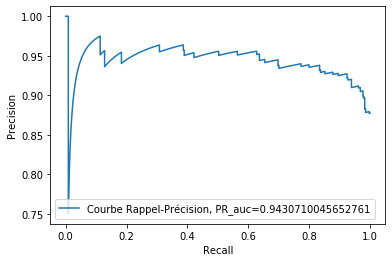

In [392]:
#  Courbe Rappel Précision
lr_precision, lr_recall, _ = precision_recall_curve(test_y, pred_proba)
lr_f1, lr_auc = f1_score(test_y, y_pred), auc(lr_recall, lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
plt.plot(lr_recall, lr_precision, label='Courbe Rappel-Précision, PR_auc='+str(lr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [ ]:
x